Objective: Sales analysis of product sales on amazon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:\Data sets\Amazon Sale Report.csv')

In [3]:
df.shape

(128976, 21)

In [4]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.drop(['New','PendingS'],axis=1, inplace=True) # delete multiple rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [8]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [9]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [10]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [11]:
df.dropna(subset=['Amount'],inplace=True)

In [12]:
df.dropna(subset=['ship-city','ship-state','ship-postal-code','ship-country' ],inplace=True)

In [13]:
df['fulfilled-by'].fillna('Self-Ship', inplace=True)

In [14]:
df['fulfilled-by'].unique()

array(['Easy Ship', 'Self-Ship'], dtype=object)

In [15]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [16]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [17]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9356\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [18]:
# Assuming 'Date' column contains dates in the format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [19]:
df['Amount']=df['Amount'].astype('int') 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   Order ID            121143 non-null  object        
 2   Date                121143 non-null  datetime64[ns]
 3   Status              121143 non-null  object        
 4   Fulfilment          121143 non-null  object        
 5   Sales Channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   Category            121143 non-null  object        
 8   Size                121143 non-null  object        
 9   Courier Status      121143 non-null  object        
 10  Qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  Amount              121143 non-null  int32         
 13  ship-city           121143 non-nul

## Exploratory Data Analysis

In [21]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,Self-Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574,CHENNAI,TAMIL NADU,600073,IN,False,Self-Ship


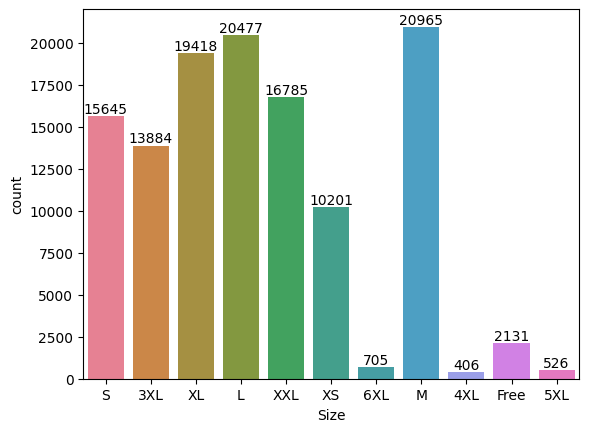

In [22]:
ax=sns.countplot(x='Size',data=df,hue='Size')

for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

,Size,Qty
6,M,20113
5,L,19667
8,XL,18611
10,XXL,16217
7,S,15019
0,3XL,13341
9,XS,9835
4,Free,2051
3,6XL,687
2,5XL,512


In [24]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values('Qty')#, ascending=False)

,Size,Qty
1,4XL,396
2,5XL,512
3,6XL,687
4,Free,2051
9,XS,9835
0,3XL,13341
7,S,15019
10,XXL,16217
8,XL,18611
5,L,19667


In [25]:
qt=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

<Axes: xlabel='Size', ylabel='Qty'>

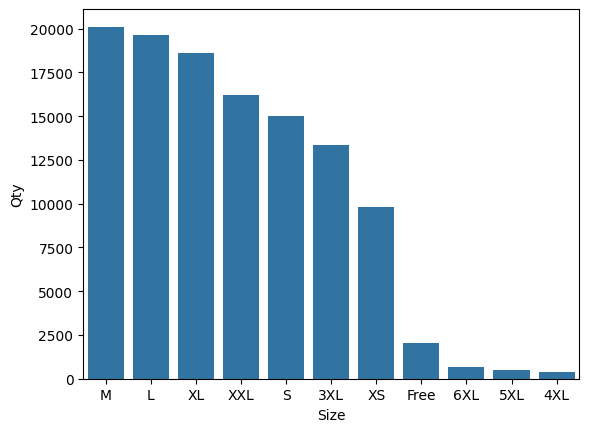

In [26]:
sns.barplot(x="Size",y='Qty',data=qt)

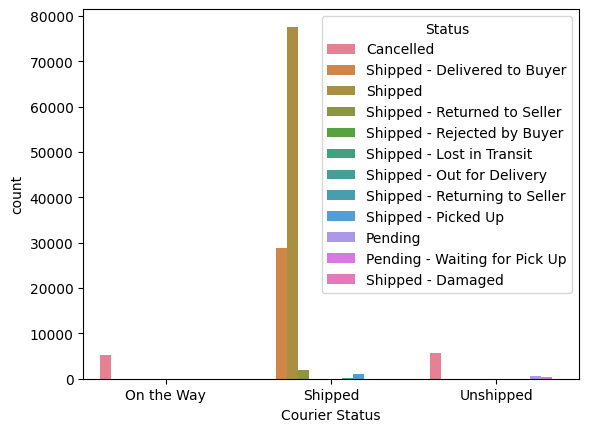

In [27]:
sns.countplot(data=df,x='Courier Status', hue='Status');

[]

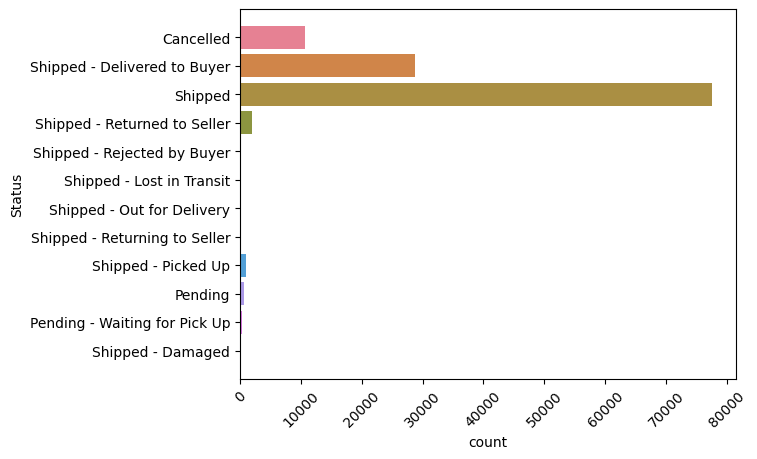

In [28]:
sns.countplot(data=df,y='Status', hue='Status')
plt.xticks(rotation=45)
plt.plot()

<Axes: >

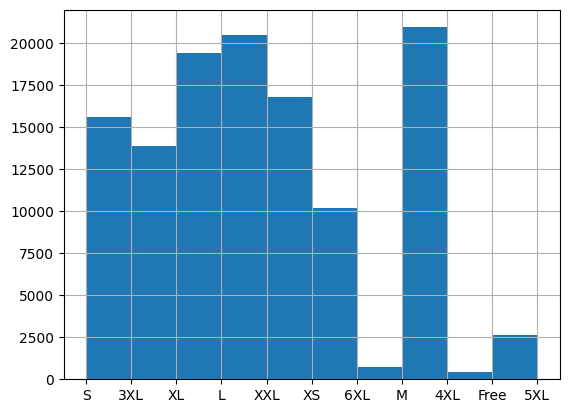

In [29]:
df['Size'].hist()

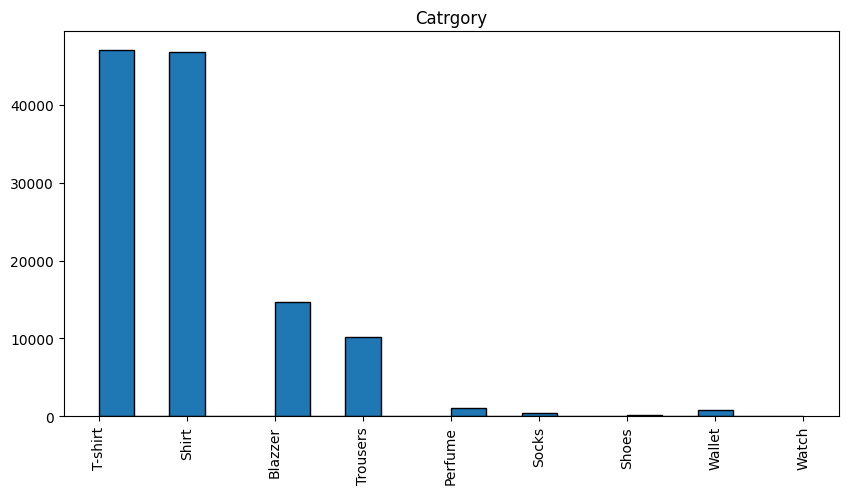

In [30]:
df['Category']=df['Category'].astype(str)
column_data=df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=20, edgecolor='Black')
plt.title('Catrgory')
plt.xticks(rotation=90)
plt.show()

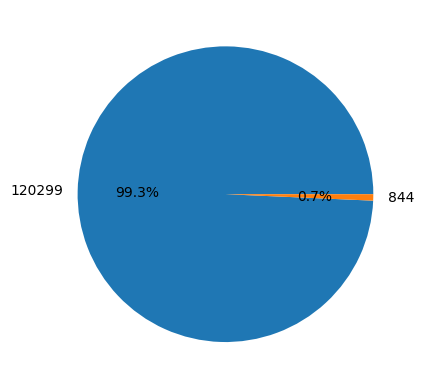

In [31]:
b2b_check=df['B2B'].value_counts()

plt.pie(b2b_check, labels=b2b_check, autopct='%1.1f%%')
plt.show()

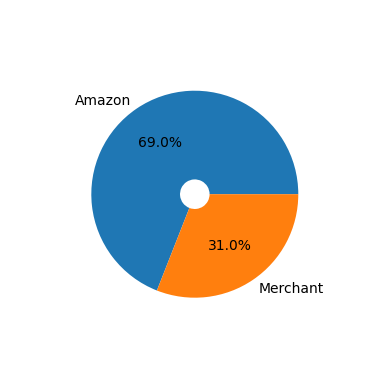

In [32]:
a1 = df['Fulfilment'].value_counts()

fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

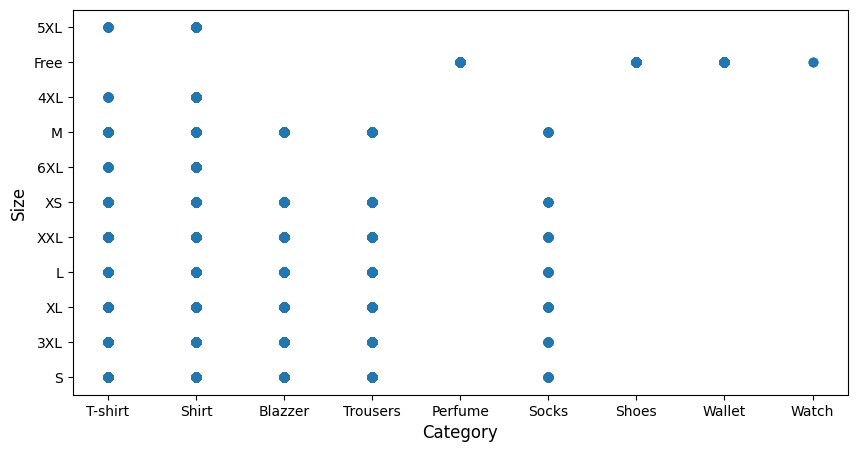

In [33]:
x=df['Category']
y=df['Size']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('Category' ,fontsize=12)
plt.ylabel('Size', fontsize=12);

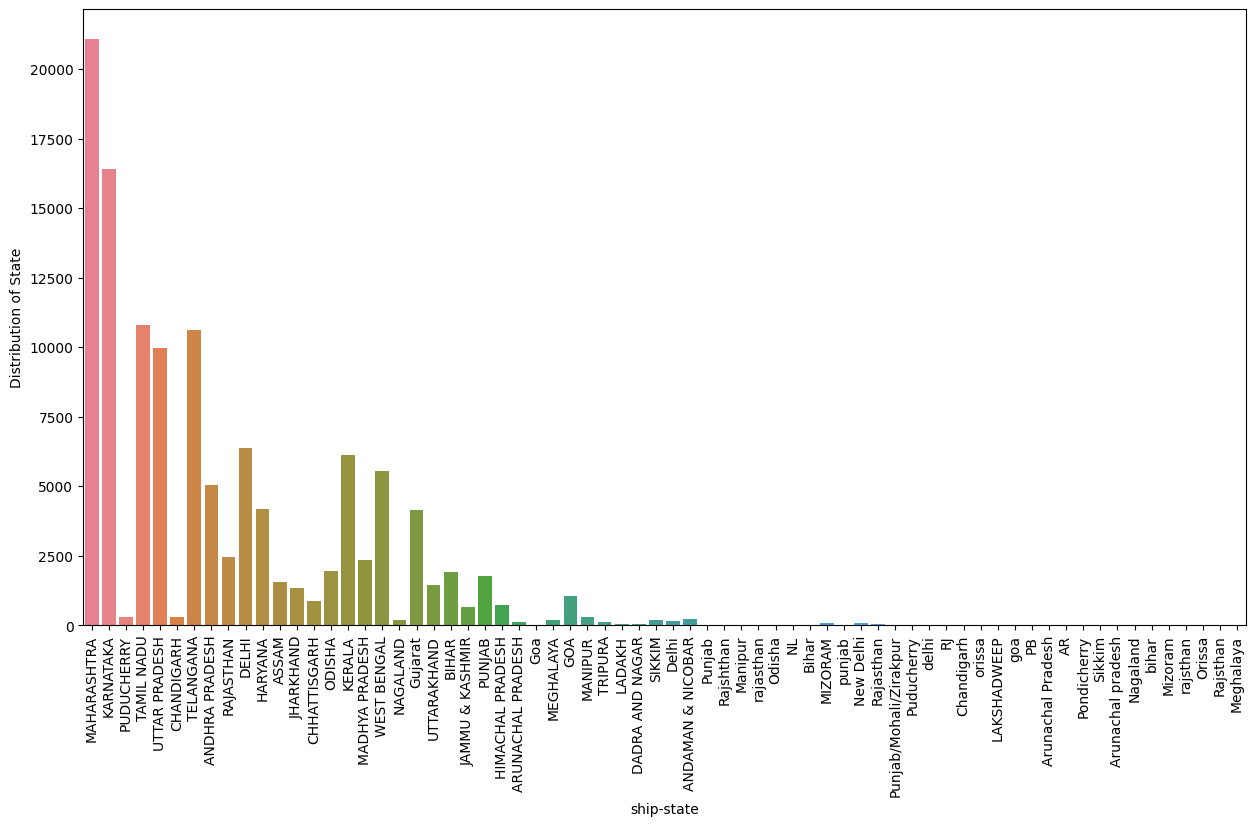

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='ship-state', hue='ship-state')
plt.xlabel('ship-state')
plt.ylabel('Distribution of State')
plt.xticks(rotation=90)
plt.show()

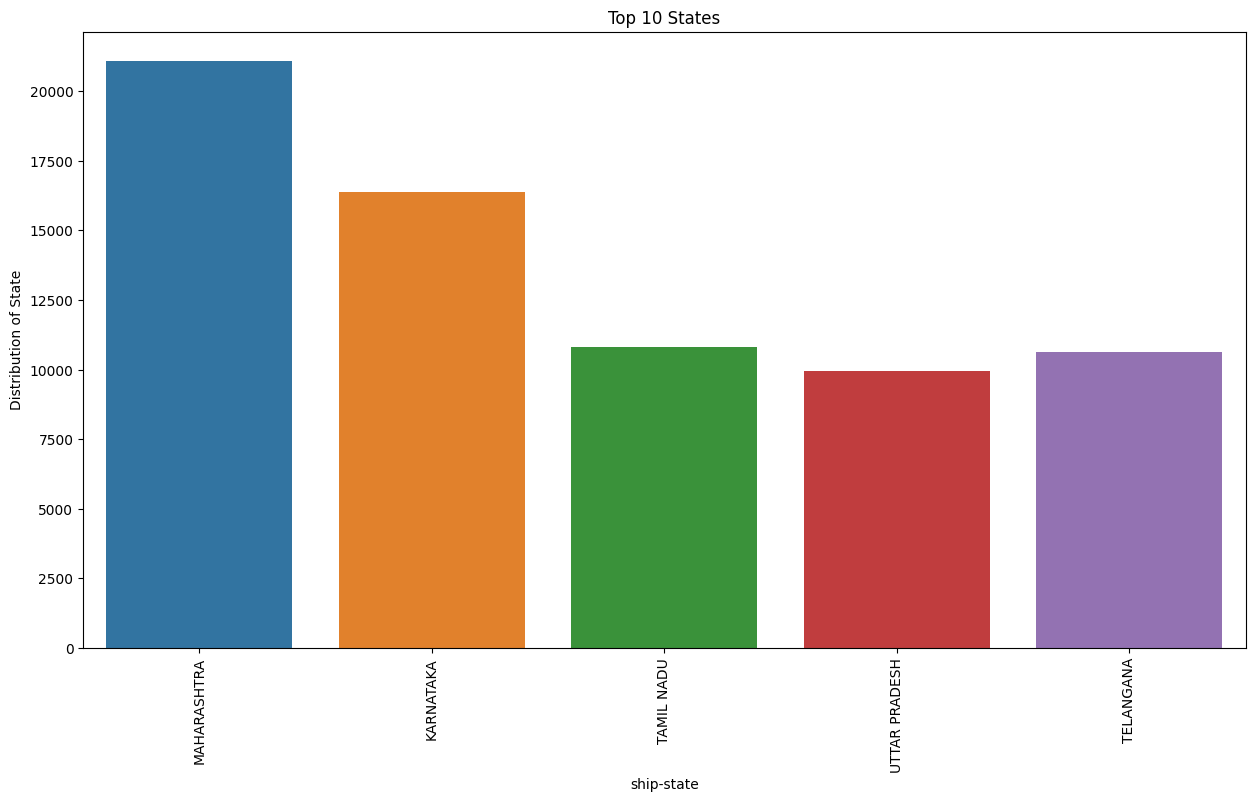

In [35]:
top10_state=df['ship-state'].value_counts().head()
top_states=top10_state.to_frame()
plt.figure(figsize=(15,8))
sns.countplot(data=df[df['ship-state'].isin(top_states.index)], x='ship-state', hue='ship-state')
plt.title('Top 10 States')
plt.xlabel('ship-state')
plt.ylabel('Distribution of State')
plt.xticks(rotation=90)
plt.show()

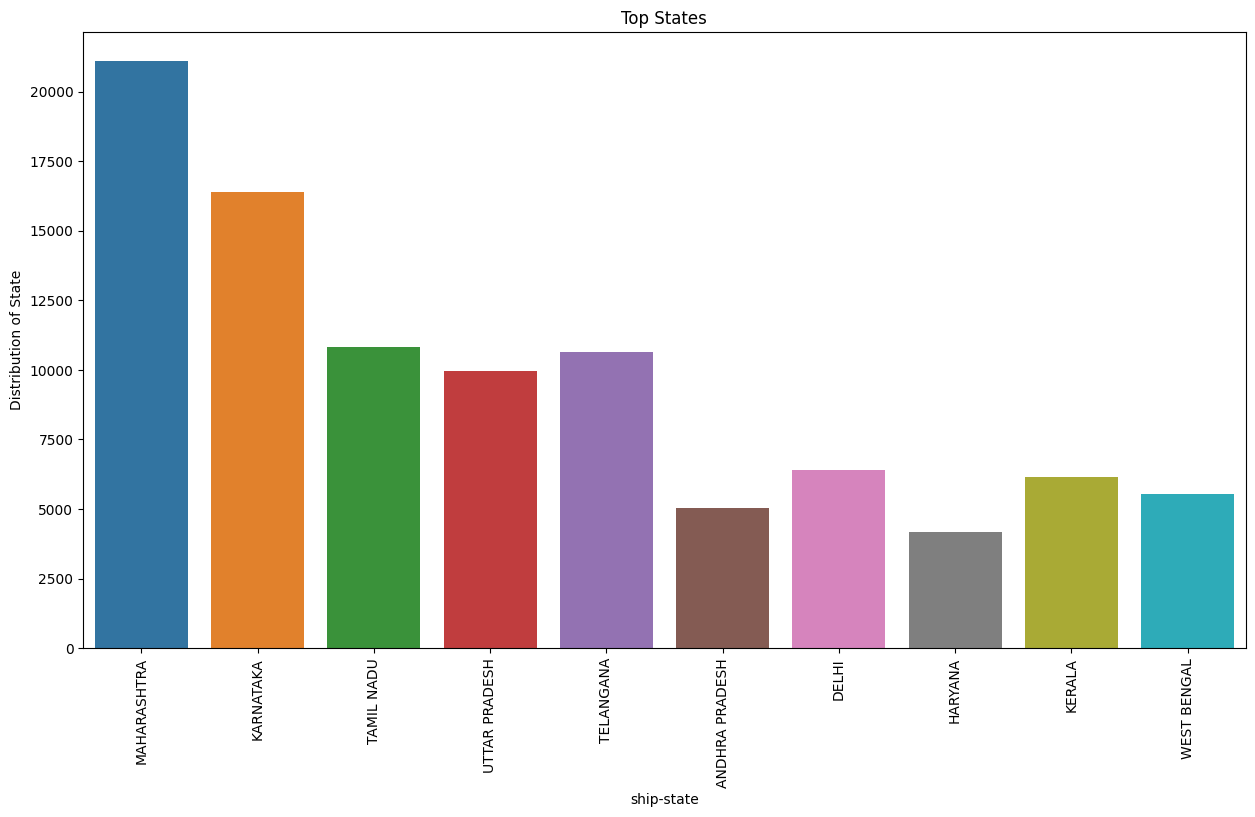

In [36]:
top_states=df['ship-state'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.countplot(data=df[df['ship-state'].isin(top_states.index)], x='ship-state', hue='ship-state')
plt.title('Top States')
plt.xlabel('ship-state')
plt.ylabel('Distribution of State')
plt.xticks(rotation=90)
plt.show()